In [ ]:
'                                   
Hypothesis: I think the priority of visible growth in popularity will be affected by the following predictors.
            H1: The age of the survey participant. I feel like there is a certain age range where this will matter more than
                others. (PG13Resp later converted to Q12)
            H2: The order in which this response variable was submitted. I think this will hint at how important the 
                participant felt this factor was. ()
            H3: How much time the participant spent on question 5 in total. I think this will indicate how much time the user
                spent thinking about the question which will indicate how much time they thought about this choice 
            H4: I feel their level of experience will also be a good predictor to how important visible growth is to the
                user. I think there is some experience range where they will be more concerned with the popularity of their
                projects
            H5: I think the number of projects they have worked on will also hint at how important a growth in popularity is
                to the user
            H6: Their job at the time may indicate how the popularity of their is a priority
            H7: Why they chose this package will hint at the priority of growth in popularity
            H8: the time between quesion 4 was submitted and the time response 5_4 was submitted is relavant. It hints at how
                much thought went into this response
            H9: the total time spent on the quiz says something about how much the user was seeking a growth in popularity

My predictors:

    __type____|___Name_____|________________________________Description______________________________________         
    response  |   VGPR_HL  | how important was visible growth in popularity when choosing the package
              |            | (1-5) (Not a Priority-Essential) converted to High=0/low=1 ( low < medium <= High)
    __________|____________|_________________________________________________________________________________
    Para Data |   TPG5S    | *the time it took for question 5 to be submitted (PG5submit)
              |   T4S45R   | *the time between when 4 was submitted and response 5_4 was chosen
              |     TT     | *total time spent on quiz     
   ___________|____________|_________________________________________________________________________________
              |   VPGO     | the order the response was chosen
     Meta     |  PG6R/Q6   | responses to question 6(Experience level)
     Data     |  PG9R/Q9   | responses to question 9(number of previous projects)
              | PG12R/Q12  | responses to question 12(age of user)
              |  PG8R/Q8   | responses to question 8(Job of particanpant)
              |  PG3R/Q3   | responses to question 3(why user chose this package)
   ___________|____________|__________________________________________________________________________________           

'

In [ ]:
' Explanation of how I got the data from given .csv and description of how it relates to predictors

    I grabbed the columns for my predictors from the loaded data file "TechSurvey - Survey.csv" and called it data.
    The columns I grabbed from data where:
        |---data$Start -- the time as a date and time when each quiz was started
        |   data$End   -- the time when the quiz was completed as a data and time
        |            Note: *used method provided by Dr. Mockus to convert to unix seconds
        |                  *used the difference between these(End - Start) to get predictor TT
        |   data$PG4Submit  --The time question 4 was submitted
Timing--|   data$PG5Submit  --The time question 5 was submitted
 Data   |            Note: * used method provided by Dr. Mockus to convert to unix seconds
        |            Note: * used method provided by Dr. Mockus to convert them into the seconds it took to complete 
        |                    questions
        |                  * used this to get predictor T5
        |   data$PG5_4Time: --The time the response to my response variable PG5_4VGP was submitted
        |            Note: used method provided by Dr. Mockus to convert to unix seconds
        |            Note: converted this to how much time has passed from when question 4 
        |                  was submitted (VGP5_4Time - PG4Submit) for predictor T4_54
        |------------    

         |-------------------------------------------------------------------------------------------------------------------
         |    data$PG5_4Order  --The order my response variable was submitted compared to the other options in 
         |                      question 5 to get predictor VGPO
         |    data$PG3Response --The response to question 3 (Why did the user choose this package) for predictor Q3
Responese|    data$PG6Response --The response to question 6 (The years of experience in development) for predictor Q6
  Data   |    data$PG8Response --The response to question 8 (The job of the user at the time) for predictor Q8
         |    data$PG9Response --The response to question 9 (The number of projects the user has worked on) for predictor Q9
         |    data$PG12Response--The response to question 12 (The age range of the user) for predictor Q12
         |-------------------------------------------------------------------------------------------------------------------

'

In [ ]:
'descriptive analysis of the proposed measures







'

In [ ]:
'transformation and cleaning statement:

 -----I used discard imputation and removed all observations with empty or NA containing entries. This left only 441 
      observations. I thought about about doing some other form of imputation but any I could think of would not 
      accurately reflect the data I am trying to model and often added bad data points in the process so I decided against
      this. from around line 65 --> iine 219 in cell 0
 
 -----I converted all variables into a numeric versions including those that were more class like. I attempted to rank
      the label/class entries from the one that lead to the lowest probability at the index 1 to the one that would lead to
      the highest at the highest index. If my assumptions are correct it will lead to positive coefficents, if not they will 
      end up negative.
 
 -----I converted the response variable into a high low version where all entries below medium are low priority
      and all others are high and then converted this into a numeric version where high = 1, and low = 0.

 -----I allowed to predictor VGPO(the order this response was chosen relative to the other choices in Question 5)
      to stay relatively the sam but I locked the max order number to 13 for the last choice. I think the higher the order
      number the lower the priority. If this is so VGPO will have a negative coefficient if not it will be positive

'

In [ ]:
'correlation analysis and a statement about whhether or not some of the measures are too correlated and need to be dropped

    See cells 

'

In [ ]:
'fitting of the statistical model-- See cells
interpretation of coefficients-- See cells
Please use lectures/fdacStats.ipynb and lecture slides for guidance--Seee cells
'

In [131]:
# include statments 

options(digits = 9)
library(e1071)
library(caret)
library(lattice)
library(ggplot2)
library(Hmisc)


In [35]:
############################################ My Methods

#takes raw prediction data and a set of repsose labels and picks the one with the highest probability
get_predictions <- function(predictions, res_l){
    ret_vec = c()
    ret_l = list()
    
    for(i in 1:nrow(predictions)){
        
        ro <- predictions[i,]
        mx <-max(ro)
        ret_vec[length(ret_vec)+1 ] <- res[ match(mx, ro)] 
    }
    
    return (ret_vec)
}


############################################################################################################################

select_data_frame<-function(df, df_list){
    # 1  = response to question 2
    # 2  = response to question 3
    # 3  = response to question 4
    # 4  = response to question 6
    # 5  = response to question 8
    # 6  = response to question 9
    # 7  = response to question 10
    # 8  = response to question 11
    # 9  = response to question 12
    # 10 = response to question the order response variable was chosen
    # 11 = total survey time
    # 12 = time between when response was chosen and 5 was submitted
    # 13 = time it took to do question 5
    # 14 = time between when 4 ws submitted and response was chosen
    # 15 = responses chosen for response variable (what we are looking to model)
    
    # 1    2   3  4  5  6  7  8   8  10  11  12   13
   #TT,T54_5,Q2,Q3,Q4,Q6,Q8,Q9,Q10,Q11,Q12,VGPO,VGPR
    
    #            1      2      3      4       5       6      7       8     9    
    c_nms = c('PG3R','PG6R','PG8R','PG9R','PG12R','VGPO','TPG5S','TPSR','VGPR')
    #c_nms = c('Comp.1','Comp.2','Comp.3','Comp.4','Comp.5','Comp.6','Comp.7','Comp.8','Comp.9','Comp.10','Comp.11',
    #          'Comp.12','VGPR')
    data_labels = c()
    
    
    for(i in df_list){
        data_labels[length(data_labels)+1] <- c_nms[i]
    }
    print(data_labels)
    print(df_list)
    return(make_data_frame(df, data_labels, df_list))
}




# makes a data fram using given data from df, the names of in dim_nm(dimenstion names)
# and the list l(list of dimension names)
# l contains which columns you want to add to return data frame(ret_df) from df, 
# and dim_nm contains the names of the added dimensions
make_data_frame <-function(df, dim_nm, l){
    
    # add first column to data frame nameing it the first dimension name
    ret_df <-data.frame(df[,1])
    dimnames(ret_df)[[2]]<-c(dim_nm[1])
    
    # loop through creating and nameing as you go
    for(i in 2:length(l)){
        
        ret_df[dim_nm[i]]<-df[,l[i]]
    }
    
    return(ret_df)
}
#############################################################################################################################

#converts a given date to unix seconds
date_to_unix_sec <- function(val){
    
    num = as.numeric(as.POSIXct(strptime(val, '%Y-%m-%d %H:%M:%S')))
    
    return(num)
}


#Given a set of start times and a set of time stamps to go to will return the total seconds between the two
# values should already be converted to seconds
# makes sure the values are numeric in the return list
seconds_since_start<-function(start, time_stamp)
{
    dif_l = c()
    diff = list()
    
    for(i in 1:length(time_stamp) ){
        if( !(is.na(time_stamp[i])) & !(is.na(start[i])) ){
            dif_l[i] <- as.numeric(as.numeric(time_stamp[i]) - as.numeric(start[i]))    
        }
        
    }
    
    return(dif_l)
}

make_ignore_list <- function(array_l, ignore_l){
      
    idx = 1
    for(entry in array_l ){
        if( is.na(entry) ){
            if(!(idx %in% ignore_l)){
                ignore_l[length(ignore_l)+1] = as.numeric(idx)
            }
        }else if(entry == ''){
            if(!(idx %in% ignore_l)){
                ignore_l[length(ignore_l)+1] = as.numeric(idx)
            }  
        }
        idx <- idx + 1
    }
    #print(length(ignore_l))
    return(ignore_l) 
}

###########################################################################################################################

make_label_list<-function(d_col, labels){
    for(i in 1:length(d_col)){
        label <- d_col[i]
        if( !(label %in% labels) & label != "" & !is.na(label)){
            labels[length(labels)+1] = as.character(label)
        }
    }
    return (labels)   
}
  
# replaces all responses that are given in the other field as other for simplification
make_list_othersI<-function(d_col,valids, val_type){
    
    r_l = list()
    
    for(i in 1:length(d_col)){
        
        resp = d_col[i]
        #print(resp)
        if(resp != '' & !is.na(resp)){
            
            if(resp %in% valids){
                if(val_type == 'c'){
                    r_l[length(r_l) + 1] <- as.character(resp)    
                }else if(val_type == 'i'){
                    r_l[length[r_l]+1] <- as.integer(resp)
                }else if(val_type == 'n'){
                    r_l[length[r_l]+1] <- as.numeric(resp)
                }
                
            }else{
                r_l[length(r_l) + 1] <- 'other'
            }
        }
    }
        
        return ( r_l )
}
############################################################################################################################        
clean_label_data<-function(df_col, ign_l, label_l){
    ret_c <- c()
    
    for(i in 1:length(df_col)){
        if(!(i %in% ign_l)){
            item <- df_col[i]
            if(is.na(item)){
                #ret_c[length(ret_c)+1] <-as.character(item)
                ret_c[length(ret_c)+1] <- item
            }else if(item == ''){
                print('found a blank one')
                ret_c[length(ret_c)+1] <- NA
            }else if(item != ''){ 
                if(item %in% label_l){
                    ret_c[length(ret_c)+1] <- as.character(item)
                    #ret_c[length(ret_c)+1] <- item
                }else{
                    ret_c[length(ret_c)+1] <- as.character("other")
                    #ret_c[length(ret_c)+1] <- "other"
                }
            }
        }
    }
    
    return(ret_c)
}     
    
    
    
clean_label_dataA<-function(df_col, ign_l, label_l){
    ret_c <- c()
    
    for(i in 1:length(df_col)){
        if(!(i %in% ign_l)){
            item <- df_col[i]
            
            if(item %in% label_l){
                ret_c[length(ret_c)+1] <- as.factor(item)
                #ret_c[length(ret_c)+1] <- item
            }else{
                ret_c[length(ret_c)+1] <- as.factor("other")
                #ret_c[length(ret_c)+1] <- "other"
            }
            
        }
    }
    
    return(ret_c)
}     
    
    
    
        
# cleans the given data column of empty space and NA        
clean_numeric_data<- function(df_col, ign_l){
    ret_c <- c()
    
    for(i in 1:length(df_col)){
        if(!(i %in% ign_l)){
            item <- df_col[i]
            if(is.na(item)){
                 ret_c[length(ret_c)+1] <- item
            }else if(item != ''){ 
                ret_c[length(ret_c)+1] <- as.numeric(item)
            }else{
                ret_c[length(ret_c)+1] <- NA
            }
            
        }
    }
    
    return(ret_c)
}
########################################################################################################################
normalize <-function(d_arry){
    
    
    mu = mean(d_arry)
    
    sdev = sd(d_arry)
    
    
    for(i in 1:length(d_arry)){
        val = d_arry[i]
        d_arry[i] <- (d_arry[i] - mu)/ sdev
    }

    return(d_arry)
}
########################################################################################################################
    

In [36]:
find_empty<- function(d_col){
    idx = 1
    empty_idx = list()
    for(i in d_col){
        if(is.na(i)){
            
        }else if(i == ''){
            empty_idx[length(empty_idx)+1] = idx
        }   
        idx <- idx + 1 
    } 
    
    
    return(empty_idx)
}


replace_empty=function(d_col){
    cnt = 1
    for(i in d_col){
        if(is.na(i)){
            print('found na')
        }else if( i == ''){
            data[,'Device'][cnt] <- NA
        }
        cnt = cnt + 1
    } 
    return(d_col)
}


get_vgptime=function(order, qt, dcol){
    
    for(i in 1:length(dcol)){
        if(is.na(dcol[i])){
            tseg = round(as.numeric(qt[i])/13,digits = 0)
            o = as.numeric(order[i])
            
            dcol[i]<- as.integer(tseg*o)
            #print(dcol[i])
        }
    }
    
    return(dcol)
}

In [37]:
###################### contains:
#####    get_time_dif
#####    convert_high_low
#####    convert_to_num

# figure out how much time passed between last response choice and VPG

get_time_dif = function(data){
    
    dPG5_4O <- data$PG5_4Order
    timediff = list()
    for(i in 1:length(dPG5_4O)){
        
        o54 <- as.numeric(dPG5_4O[i])
        
        last = o54 - 1
        #print(last)
        for(j in 1:13){
            
            if(j != 4){
                
                vname = paste(c('PG5_',as.character(j),'Order'), collapse = '')
                #print(vname)
                prevO <- as.numeric(data[,vname])
                 
                crnt = prevO[i] 
                
                #print(crnt)
                
                if(crnt == last ){
                    #print('found current and last')
                    vnameTime = paste(c('PG5_',j,'Time'), collapse = '')
                    timediff[length(timediff)+1] = as.numeric(data[i, 'PG5_4Time']) - as.numeric(data[i,vnameTime])
                    break
                }
            }
        }
    }
    return(timediff)  
}

################################################################################################################
convert_high_low=function(dcol_num, limit){
    
    ret_fac = list()
    
    for(i in 1:length(dcol_num)){
        
        if(dcol_num[i] >= limit){
            ret_fac[length(ret_fac)+1] <- as.character('High')
            
        }else{
            ret_fac[length(ret_fac)+1] <-as.character('Low')
        }
    }
    
    return(ret_fac)
    
}

convert_to_num=function(dcol_num, labels){
    
    ret_fac = c()
    
    for(i in dcol_num){
            ret_fac[length(ret_fac)+1] <- as.numeric(match(i, labels))
    }
    
    return(ret_fac)
    
}

In [ ]:
############################################ My Methods


#Given a set of start times and a set of time stamps to go to will return the total seconds between the two
# values should already be converted to seconds
# makes sure the values are numeric in the return list
seconds_since_start<-function(start, time_stamp)
{
    dif_l = c()
    diff = list()
    
    for(i in 1:length(time_stamp) ){
        if( !(is.na(time_stamp[i])) & !(is.na(start[i])) ){
            dif_l[i] <- as.numeric(as.numeric(time_stamp[i]) - as.numeric(start[i]))    
        }
        
    }
    
    return(dif_l)
}

# helps to create a list of rows with bad data to be ignored
# only adds the index containing a blank or NA entry if it does not already exist
make_ignore_list <- function(array_l, ignore_l){
      
    idx = 1
    for(entry in array_l ){
        if( is.na(entry) ){
            if(!(idx %in% ignore_l)){
                ignore_l[length(ignore_l)+1] = as.numeric(idx)
            }
        }else if(entry == ''){
            if(!(idx %in% ignore_l)){
                ignore_l[length(ignore_l)+1] = as.numeric(idx)
            }  
        }
        idx <- idx + 1
    }
    #print(length(ignore_l))
    return(ignore_l) 
}

# makes a list of responses where responses that are given in the other field are marked as other for simplification
# takes as an argument a list of the given responses called valids
# if the response is not in valids it is marked as other
# the created list is used in conjuction with method , to help clean the data
make_list_othersI<-function(d_col,valids, val_type){
    
    r_l = list()
    
    for(i in 1:length(d_col)){
        
        resp = d_col[i]
        #print(resp)
        if(resp != '' & !is.na(resp)){
            
            if(resp %in% valids){
                if(val_type == 'c'){
                    r_l[length(r_l) + 1] <- as.character(resp)    
                }else if(val_type == 'i'){
                    r_l[length[r_l]+1] <- as.integer(resp)
                }else if(val_type == 'n'){
                    r_l[length[r_l]+1] <- as.numeric(resp)
                }
                
            }else{
                r_l[length(r_l) + 1] <- 'other'
            }
        }
    }
        
        return ( r_l )
}

# creates a list of unique labels used for cleaning label based data
make_label_list<-function(d_col, labels){
    for(i in 1:length(d_col)){
        label <- d_col[i]
        if( !(label %in% labels) & label != "" & !is.na(label)){
            labels[length(labels)+1] = as.character(label)
        }
    }
    return (labels)   
}
    

    
# cleans the given data column of empty space and NA using the ignore list       
clean_numeric_data<- function(df_col, ign_l){
    ret_c <- c()
    
    for(i in 1:length(df_col)){
        if(!(i %in% ign_l)){
            item <- df_col[i]
            if(is.na(item)){
                 ret_c[length(ret_c)+1] <- item
            }else if(item != ''){ 
                ret_c[length(ret_c)+1] <- as.numeric(item)
            }else{
                ret_c[length(ret_c)+1] <- NA
            }
            
        }
    }
    
    return(ret_c)
}
    
# only loads observations not in ignore list and just for 
# good measure makes sure non given labels are converted to other
# there is some logic that should be removed, but left in due to time    
clean_label_data<-function(df_col, ign_l, label_l){
    ret_c <- c()
    
    for(i in 1:length(df_col)){
        if(!(i %in% ign_l)){
            item <- df_col[i]
            if(is.na(item)){
                #ret_c[length(ret_c)+1] <-as.character(item)
                ret_c[length(ret_c)+1] <- item
            }else if(item == ''){
                print('found a blank one')
                ret_c[length(ret_c)+1] <- NA
            }else if(item != ''){ 
                if(item %in% label_l){
                    ret_c[length(ret_c)+1] <- as.character(item)
                    #ret_c[length(ret_c)+1] <- item
                }else{
                    ret_c[length(ret_c)+1] <- as.character("other")
                    #ret_c[length(ret_c)+1] <- "other"
                }
            }
        }
    }
    
    return(ret_c)
} 
    
    
convert_high_low=function(dcol_num, limit){
    
    ret_fac = list()
    
    for(i in 1:length(dcol_num)){
        
        if(dcol_num[i] >= limit){
            ret_fac[length(ret_fac)+1] <- as.character('High')
            
        }else{
            ret_fac[length(ret_fac)+1] <-as.character('Low')
        }
    }
    
    return(ret_fac)
    
}

convert_to_num=function(dcol_num, labels){
    
    ret_fac = c()
    
    for(i in dcol_num){
            ret_fac[length(ret_fac)+1] <- as.numeric(match(i, labels))
    }
    
    return(ret_fac)
    
}

In [133]:
#                                          Cell 0

############################################################################################################################
############################################################################################################################
############################################  Data Extraction   ############################################################
############################################################################################################################
############################################################################################################################



#####################    Read the data from given .csv fiel
data <- read.csv('TechSurvey - Survey.csv', header = T)



########################   Extract some of the given time information and transform it into stuff I can use 

# convert date to unix second
# start and end times
# then do submission times
for (i in c("Start", "End")){ 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
    #data[,i] = impute(data[,i], median)
}
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))    
    #data[,vnam] = impute(data[,vnam], min)
}


# convert responses to quesion 5 to unix seconds
for (i in 1:13){
    vnam = paste(c("PG5_",i,"Time"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S"))) 
}


# get the time between when question 4 was submitted and when response 5_4 was submitted
# the below method goes through each row and performs PG5_4Time - PG4Submit
T4_54 <- seconds_since_start(data$PG4Submit, data$PG5_4Time)


# calculate differences in time  for submits
# Provided by Dr. Mockus
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

#########  Calculate the total time the quiz took for each observed quiz by subtracting the unix seconds the 
#########  quiz was ended from when it was started. This is accomplished with the method seconds_since_start
#########  which just goes row by row calculating End[i] - Start[i] and storing the result in a vector returned 
#########  as TT(Totol Time)

TT  = seconds_since_start(data$Start, data$End)

######################################################################################################################

########################################################################################################################
########################################################################################################################
###############################################   Data Cleaning    #####################################################
########################################################################################################################
########################################################################################################################


############# Make a list of indices to ignore. The list will consist of row indices that contain blank entries or
############# NA entries. This will help remove observations that contain missing or bad data. I tried earlier to 
############# use some imputation methods but it introduced many problems so I decided to go with discard imputation.
############# I realize I lose a lot of data this way but the random imputation method wouldnt accuratly mimic the actual 
############# data and the mean and median method's I tried made the time based predictors have bad data(negative) entries
############# I do this with my method make_ignore_list which goes through the given data column and looks for missing
############# or NA entries and stores the index where this occurs if it is not already in the list(see line 131 in cell )

ignore_l = list()

#############################   Grab bad data indices for response information

ignore_l = make_ignore_list(data$PG5_4VGP, ignore_l)    # 10-Response variable, the responses to question 5_4
ignore_l = make_ignore_list(data$PG5_4Order, ignore_l)  # 9--The order the response to quesiion 5_4 was chosen
ignore_l = make_ignore_list(data$PG12Resp, ignore_l)    # 8--Response to question 12 (the age of the user)
ignore_l = make_ignore_list(data$PG9Resp, ignore_l)     # 7--Response to question 9  (number of projecst worked on)
ignore_l = make_ignore_list(data$PG8Resp, ignore_l)     # 6--Response to question 8  (the job the user has at the time)
ignore_l = make_ignore_list(data$PG6Resp, ignore_l)     # 5--Response to question 6  (years of experience in development)
ignore_l = make_ignore_list(data$PG2Resp.1, ignore_l)   # 4--Response to question 3  (why this package was chosen)



############################  Grab bad data indices for time data

#for predictor T5
ignore_l = make_ignore_list(data$PG5Submit, ignore_l)   # 3--data for when question 5 was submitted


# for predictor T4_54 get bad indices for submit time of question 4
# and question 5_4
ignore_l = make_ignore_list(data$PG4Submit, ignore_l)   # 2--time when question 4 was submitted
ignore_l = make_ignore_list(data$PG5_4Time, ignore_l)   # 2--time response 4 for questionm 5 was submitted

#for for predictor total time (TT)
ignore_l = make_ignore_list(data$End, ignore_l)          #1         
ignore_l = make_ignore_list(data$Start, ignore_l)        #1 


print('We will ignore this many observations')
length(ignore_l)

######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################


####### use the method make_list_othersI to convert questions with the other entry option so that any entry that is not
####### one of the given options is marked as other. It takes the data column and a list of the given options for that
####### question and returns the adjusted data column

# Make adjusted list of responses for Question 3
# where responses that are given in other field are just labeled as other
PG3labels = list('The core "data.frame" object lacked functionality that I needed',
                 'Chose the package to be compatible with other packages in my project',
                 'I saw a recommendation for the package',
                 'I didn\'t choose to use the package, it was included implicitly / unintentionally')
pg3test = make_list_othersI(data$PG2Resp.1, PG3labels, 'c')


# Make adjusted list of responses for Question 8
# where responses that are given in other field are just labeled as other
PG8labels = list("Data Scientist",
                 "Software Engineer")
pg8test = make_list_othersI(data$PG8Resp, PG8labels, 'c')


########## create a list of labels for later processing
labels = list()

labels<-make_label_list(pg3test, labels)
labels<-make_label_list(data$PG5_4VGP, labels)
labels<-make_label_list(data$PG6Resp, labels)
labels<-make_label_list(pg8test, labels)
labels<-make_label_list(data$PG9Resp, labels)
labels<-make_label_list(data$PG12Resp, labels)

######################################################################################################################
######################################################################################################################

#####################             adjust the predictors I chose: 
############                               For numeric predictors use clean_numeric_data to remove bad data
####                                       For label based predictors use clean_label_data to remove bad data
TT<-clean_numeric_data(TT, ignore_l)                            
print('Length of TT')
length(TT)

T5<-clean_numeric_data(data$PG5Submit, ignore_l)                # Time of submitting q 5 
print('length of T5')
length(T5)

T4_54<-clean_numeric_data(T4_54, ignore_l)                       # Time between q4 and response 5_4     
print('Length of T4_54')
length(T4_54)
#summary(T4_54)

Q3<-clean_label_data(data$PG2Resp.1, ignore_l, labels)             # PG3 Responses
print('length of Q3')
length(Q3)


Q6<-clean_label_data(data$PG6Resp, ignore_l, labels)                # PG6 responses
print('length of Q6')
length(Q6)


Q8<-clean_label_data(data$PG8Resp, ignore_l, labels)                # PG8 responses
print('length of Q8')
length(Q8)

Q9<-clean_label_data(data$PG9Resp, ignore_l, labels)                # PG9 responses
print('length of Q9')
length(Q9)


Q12<-clean_label_data(data$PG12Resp, ignore_l, labels)                # PG12 responses
print('length of Q12')
length(Q12)

VGPO<-clean_numeric_data(data$PG5_4Order, ignore_l)                  # VGPO 
print('length of VGPO')
length(VGPO)


# make sure the order tops out at 13
#indices found earlier
VGPO[115] <- 13
VGPO[98]  <- 13
VGPO[25]  <- 13
VGPO[121]  <- 13
VGPO[366] <-13
VGPO[375] <-13
VGPO[13] <-13
VGPO[48] <-13
VGPO[49] <-13
VGPO[52] <-13
VGPO[149] <-13
VGPO[189] <-13
VGPO[206] <-13
VGPO[298] <-13
VGPO[361] <-13
VGPO[374] <-13
VGPO[387] <-13
VGPO[421] <-13


#####################                       response variable
VGPR<-clean_label_data(data$PG5_4VGP, ignore_l, labels)               # VGPR responses to q5_4
print('length of VGPR')
length(VGPR)

#######################################################################################################################
####################                       Now convert response variable to High(1), and low(0) responses
####################                       logistic regression

####### Convert the response variable into a binary(High/low) version
####### use method convert_to_num to turn it into a set of numbers representing the labels
VGPR_num <- convert_to_num(VGPR, c('Not a Priority','Low Priority','Medium Priority','High Priority','Essential'))

####### Now use the method convert_high_low to convert the number version into a High low version
VGPR_HL <- convert_high_low(VGPR_num, 3)
#VGPR_HL
VGPR_HL <-convert_to_num(VGPR_HL, c('Low','High'))
VGPR_HL <- VGPR_HL - 1


##################### now use the options for each predictor question to convert them into numeric versions
##################### I tried to rank them based on how I think the will hint at priority 1=lowest, length=Highest

# why this package was chosen
Q3labels =    c('I didn\'t choose to use the package, it was included implicitly / unintentionally', # 1
                "Chose the package to be compatible with other packages in my project",             # 2
                'The core "data.frame" object lacked functionality that I needed',                  # 3
                'other',                                                                            # 4
                "I saw a recommendation for the package")                                           # 5                                 #


# years of experience
Q6labels =    c('Less than 2 years',                                                                # 1
                '20 years or more',                                                                 # 2
                '13 - 19 years',                                                                    # 3 
                '6 - 8 years',                                                                      # 4                                                                       # 5 
                '9 - 12 years',                                                                     # 5
                '2 - 5 years')                                                                      # 6

# job at the time
Q8labels =    c('Data Scientist',                                          # 1
                'other',                                                   # 2
                'Software Engineer')                                       # 3

# number of projects worked on 
Q9labels =    c('1',
                'More than 25',
                '16 - 25',
                '11 - 15',
                '2 - 3',
                '4 - 6',
                '7 - 10')
# age of user
Q12labels =    c('65 and over',
                 '55 - 64',
                 '45 - 54',
                 '35 - 44',
                 '25 - 34',
                 '18 - 24')

#######################################################################################################################
####################                       Now turn all non numeric predictors into numeric versions of themselves for
####################                       logistic regression
Q3nm =  as.numeric(convert_to_num(Q3,Q3labels))

Q6nm =  as.numeric(convert_to_num(Q6,Q6labels))

Q8nm =  as.numeric(convert_to_num(Q8,Q8labels))

Q9nm =  as.numeric(convert_to_num(Q9,Q9labels))

Q12nm =  as.numeric(convert_to_num(Q12,Q12labels))

VGPO <- as.numeric(VGPO)

print('Done')
# 1    2     3   4  5  6  7  8    9    10  
#TT, T4_54, T5, Q3,Q6,Q8,Q9,Q12,VGPO,VGPR

[1] "We will ignore this many observations"


[1] 931

[1] "Length of TT"


[1] 422

[1] "length of T5"


[1] 422

[1] "Length of T4_54"


[1] 422

[1] "length of Q3"


[1] 422

[1] "length of Q6"


[1] 422

[1] "length of Q8"


[1] 422

[1] "length of Q9"


[1] 422

[1] "length of Q12"


[1] 422

[1] "length of VGPO"


[1] 422

[1] "length of VGPR"


[1] 422

[1] "Done"


In [134]:
#                                      Cell 1
# 1    2     3   4  5  6  7  8    9    10  
#TT, T4_54, T5, Q3,Q6,Q8,Q9,Q12,VGPO,VGPR


print('TT')
summary(TT)

print('T4_54')
summary(T4_54)

print('T5')
summary(T5)

print('Q3')
summary(Q3nm)

print('Q6')
summary(Q6nm)

print('Q8')
summary(Q8nm)

print('Q9')
summary(Q9nm)

print('Q12')
summary(Q12nm)

print('VGPO')
summary(VGPO)

print('VGPR_HL')
summary(VGPR_HL)



[1] "TT"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  120.000   187.250   235.500   412.777   312.000 20546.000 

[1] "T4_54"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  12.0000   36.0000   48.5000   60.2844   64.7500 1365.0000 

[1] "T5"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  21.0000   56.0000   69.0000   85.4739   89.0000 1371.0000 

[1] "Q3"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 1.0000  3.0000  3.0000  3.3128  4.0000  5.0000 

[1] "Q6"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
1.00000 1.00000 4.50000 4.00237 6.00000 6.00000 

[1] "Q8"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 1.0000  1.0000  1.0000  1.5545  2.0000  3.0000 

[1] "Q9"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
1.00000 3.00000 5.00000 4.59953 6.00000 7.00000 

[1] "Q12"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
1.00000 4.00000 5.00000 4.35545 5.00000 6.00000 

[1] "VGPO"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 1.00000  4.00000  6.00000  6.77962 10.00000 13.00000 

[1] "VGPR_HL"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 1.000000 0.597156 1.000000 1.000000 

In [141]:
#                                                Cell 2

# 1    2     3   4  5  6  7  8    9    10  
#TT, T4_54, T5, Q3,Q6,Q8,Q9,Q12,VGPO,VGPR_HL

#vars <- cbind(log(TT), log(T4_54), log(T5), Q3,Q6,Q8,Q9,Q12,VGPO,(VGPR_HL))
vars <- cbind(log(TT), log(T4_54), log(T5), Q3nm,Q6nm,Q8nm,Q9nm,Q12nm,VGPO,VGPR_HL)
my_df <- data.frame(vars)

dimnames(my_df)[[2]]<-c('TT','T4_54','T5','Q3','Q6','Q8','Q9','Q12','VGPO','VGPR_HL')
#my_df
summary(my_df)
str(my_df)

       TT           T4_54            T5             Q3             Q6     
 Min.   :4.79   Min.   :2.48   Min.   :3.04   Min.   :1.00   Min.   :1.0  
 1st Qu.:5.23   1st Qu.:3.58   1st Qu.:4.03   1st Qu.:3.00   1st Qu.:1.0  
 Median :5.46   Median :3.88   Median :4.23   Median :3.00   Median :4.5  
 Mean   :5.59   Mean   :3.88   Mean   :4.30   Mean   :3.31   Mean   :4.0  
 3rd Qu.:5.74   3rd Qu.:4.17   3rd Qu.:4.49   3rd Qu.:4.00   3rd Qu.:6.0  
 Max.   :9.93   Max.   :7.22   Max.   :7.22   Max.   :5.00   Max.   :6.0  
       Q8             Q9           Q12            VGPO          VGPR_HL     
 Min.   :1.00   Min.   :1.0   Min.   :1.00   Min.   : 1.00   Min.   :0.000  
 1st Qu.:1.00   1st Qu.:3.0   1st Qu.:4.00   1st Qu.: 4.00   1st Qu.:0.000  
 Median :1.00   Median :5.0   Median :5.00   Median : 6.00   Median :1.000  
 Mean   :1.55   Mean   :4.6   Mean   :4.36   Mean   : 6.78   Mean   :0.597  
 3rd Qu.:2.00   3rd Qu.:6.0   3rd Qu.:5.00   3rd Qu.:10.00   3rd Qu.:1.000  
 Max.   :3.00

'data.frame':	422 obs. of  10 variables:
 $ TT     : num  5.6 5 4.88 5.22 5.18 ...
 $ T4_54  : num  3.5 3.14 3.74 3.3 3.71 ...
 $ T5     : num  4.39 3.97 4.01 3.58 4.22 ...
 $ Q3     : num  3 3 3 4 3 3 3 4 4 3 ...
 $ Q6     : num  1 3 6 4 6 4 4 1 6 6 ...
 $ Q8     : num  2 2 1 2 1 1 2 2 2 1 ...
 $ Q9     : num  6 4 4 6 6 6 6 5 7 1 ...
 $ Q12    : num  2 3 4 6 4 4 5 6 4 5 ...
 $ VGPO   : num  4 3 9 8 4 2 2 13 8 13 ...
 $ VGPR_HL: num  1 0 1 0 1 1 1 0 1 1 ...


In [142]:
#                                        Cell 3


# Lets do some correlation analysis on my original pridictors 

# 1    2     3   4  5  6  7  8    9    10  
#TT, T4_54, T5, Q3,Q6,Q8,Q9,Q12,VGPO,VGPR_HL

options(digits = 5)

cor(my_df,method="spearman");
#cor(my_df);

# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(my_df,.6)

,TT,T4_54,T5,Q3,Q6,Q8,Q9,Q12,VGPO,VGPR_HL
TT,1.000000,0.4426217,0.615667,0.1353182,-0.043663,0.1002074,-0.054181,0.039377,0.067886,0.0146547
T4_54,0.442622,1.0000000,0.693759,0.0660359,0.022395,-0.0017442,-0.027222,-0.066542,0.628397,-0.0015271
T5,0.615667,0.6937592,1.000000,0.0807847,-0.011492,0.0541179,-0.041763,-0.026730,0.156719,0.0432345
Q3,0.135318,0.0660359,0.080785,1.0000000,-0.035597,0.1105730,-0.077934,-0.038004,0.040806,-0.0059209
Q6,-0.043663,0.0223946,-0.011492,-0.0355972,1.000000,-0.1164689,0.217759,0.071617,0.011352,0.1456933
Q8,0.100207,-0.0017442,0.054118,0.1105730,-0.116469,1.0000000,-0.145174,-0.023552,-0.011615,-0.0130508
Q9,-0.054181,-0.0272222,-0.041763,-0.0779342,0.217759,-0.1451742,1.000000,0.084758,-0.019044,0.0492474
Q12,0.039377,-0.0665416,-0.026730,-0.0380038,0.071617,-0.0235522,0.084758,1.000000,0.017469,0.0186282
VGPO,0.067886,0.6283968,0.156719,0.0408061,0.011352,-0.0116152,-0.019044,0.017469,1.000000,-0.1698596
VGPR_HL,0.014655,-0.0015271,0.043235,-0.0059209,0.145693,-0.0130508,0.049247,0.018628,-0.169860,1.0000000


,TT,T4_54,T5,VGPO
TT,1.000000,0.44262,0.61567,0.067886
T4_54,0.442622,1.00000,0.69376,0.628397
T5,0.615667,0.69376,1.00000,0.156719
VGPO,0.067886,0.62840,0.15672,1.000000


In [105]:
#                                     Cell 4

# correlation analysis


# * Both TT and VGPO only have higher correlation(> .6) with  only one other predictor.

# * TT with T5 which makes sense as The time the user takes on Question 5 goes up the Total survey time goes up
#   TT has a little correlation with T4_54 which makes sense in a similiar way

# * VGPO with T4_54 which also makes sense because as the order number of you choice goes up the time it took to 
#   choose it will go up

# * T4_54 has high correlation with T5 and VGPO which both make sense. As you spend more time making a choice on response
#   four on question 5 the time spent on question 5 will go up and vice versa, and as VGPO or the order number of choice 4
#   goes up time spent choosing choice 4 will also go up and vice versa



# * T5 has high correlation with TT and T4_54 which both make sense as T% goes up TT will go up and vice versa, and 
#   as The time spent makeing a seletion on question 5 goes up the total time spent on question 5 will go up and vice
#    versa
#VGPO avg
print('VGPO avg correlation')
mean(c(0.0678857741,0.628396827,0.156719303))

#TT avg
print('TT avg correlation')
mean(c(0.442621707,0.615666697,0.0678857741))

#T4_54
print('T4_54 avg correlation')
mean(c(0.4426217073,0.693759242,0.6283968269))

#T5
print('T5 avg correlation')
mean(c(0.6156666967,0.693759242,0.1567193034))

#length(VGPO)

[1] "VGPO avg correlation"


[1] 0.284334

[1] "TT avg correlation"


[1] 0.375391

[1] "T4_54 avg correlation"


[1] 0.588259

[1] "T5 avg correlation"


[1] 0.488715

[1] 422

In [ ]:
#                                          Cell 5


#    From above might need to drop T4_54 and T5 
#    and VGPO seems the most stable of those with some higher correlation

          TT   T4_54       T5     VGPO
PC1 -0.38841 -0.6096 -0.55991 -0.36401
         Q6       Q8      Q9     Q12
PC2 0.53362 -0.43941 0.56466 0.30157
          TT    VGPO  VGPR_HL
PC3 -0.32227 0.50918 -0.65451
         Q3     Q12
PC4 0.37796 0.80655
         Q3     Q6    VGPO
PC5 0.72726 0.3877 0.38803
         Q3       Q8      Q12
PC6 0.41909 -0.76654 -0.34273
         Q8     Q9  VGPR_HL
PC7 0.34772 0.5759 -0.56669
          Q6      Q9 VGPR_HL
PC8 -0.66313 0.57821 0.33184
         TT       T5    VGPO
PC9 0.63563 -0.51218 0.44264
        T4_54      T5 VGPO
PC10 -0.72443 0.57632 0.37


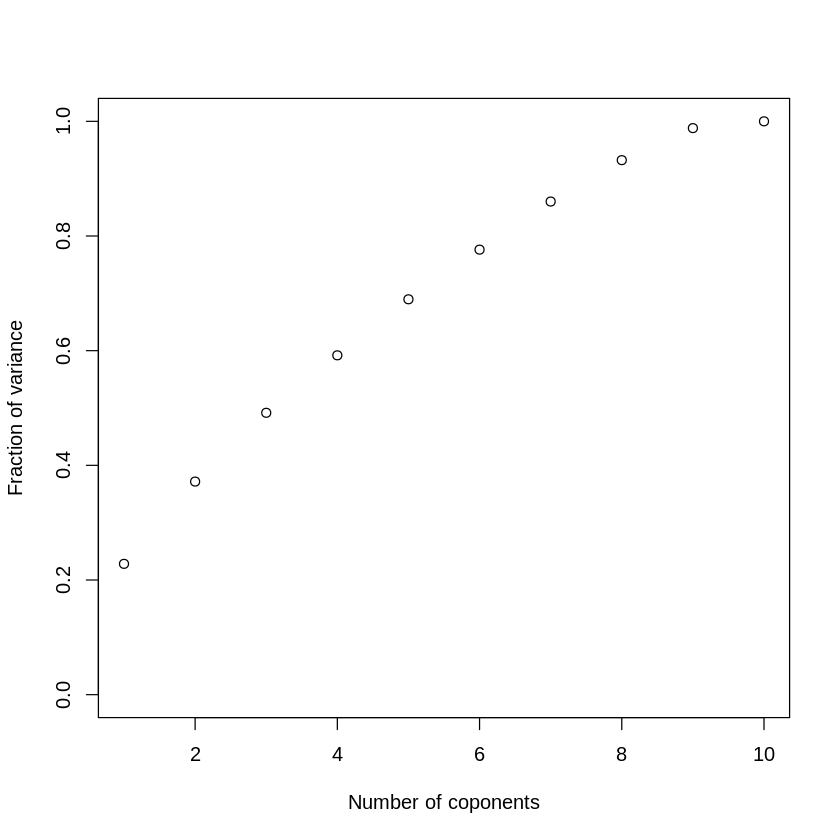

In [143]:
#                                          Cell 6

#    Now look at some PCA to do further investigation

plot(1:10,cumsum(prcomp(my_df, retx=F,scale=T)$sdev^2)/sum(prcomp(my_df, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance");
res<-prcomp(my_df, retx=F,scale=T)$rotation[,1:10];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:10)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));




Importance of components:
                       Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
Standard deviation        1.5    1.2    1.1    1.0    1.0   0.93   0.92   0.85
Proportion of Variance    0.2    0.1    0.1    0.1    0.1   0.09   0.08   0.07
Cumulative Proportion     0.2    0.4    0.5    0.6    0.7   0.78   0.86   0.93
                       Comp.9 Comp.10
Standard deviation       0.75    0.34
Proportion of Variance   0.06    0.01
Cumulative Proportion    0.99    1.00

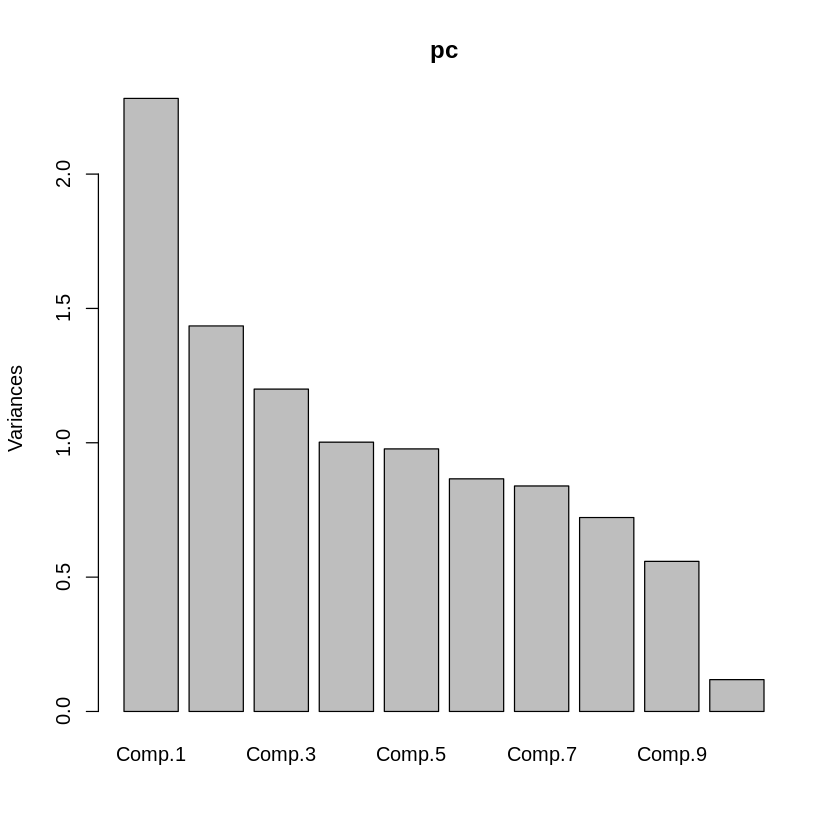

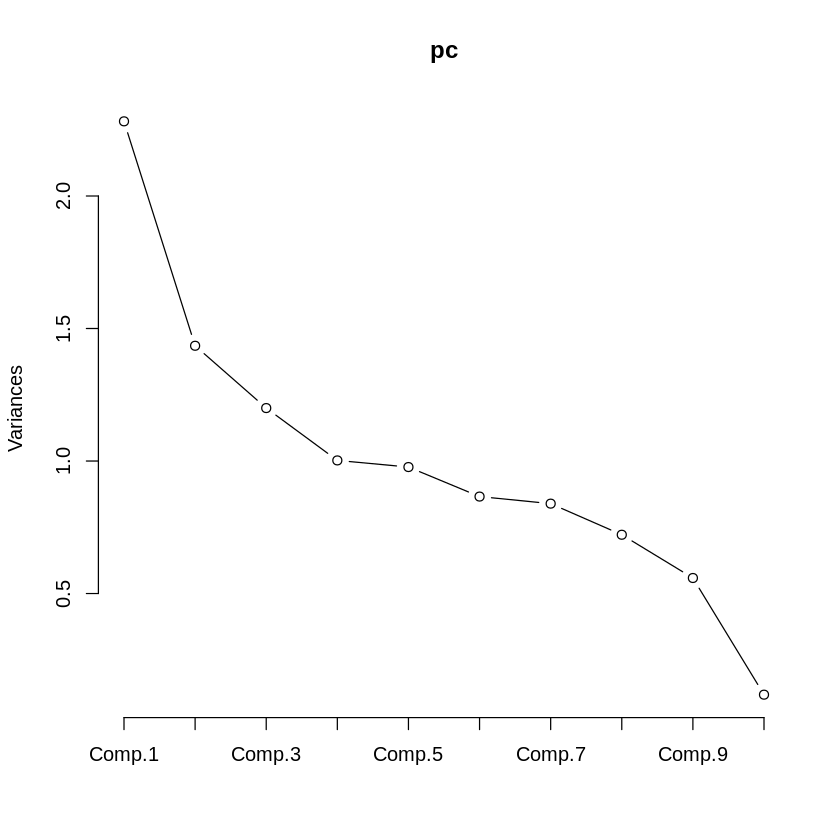

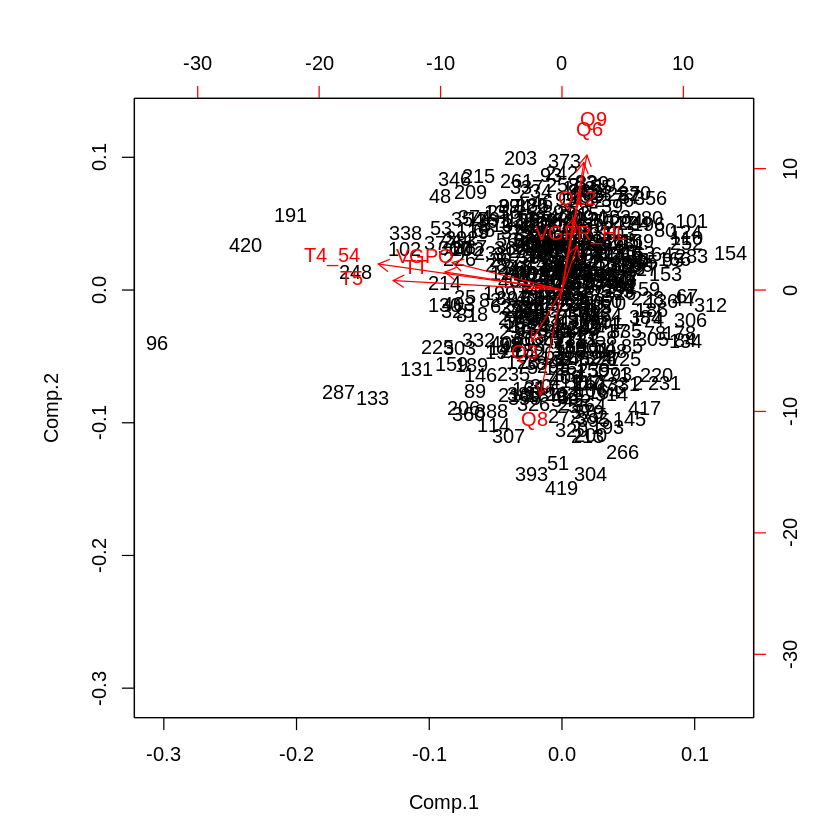

In [144]:
#                                          Cell 7

options(digits = 1)
pc <- princomp(my_df, cor=TRUE, scores = TRUE)
summary(pc)

plot(pc)
plot(pc, type = 'l')
biplot(pc)

In [ ]:
'                                     Cell 8

The above two PCA analysis  results suggests that we need about 5 PC\'s to account for  > 70% of variance  
              TT        T4_54           T5        VGPO
PC1 -0.388412052 -0.609600219 -0.559914403 -0.36401177
            Q6          Q8          Q9         Q12
PC2 0.53361551 -0.43941101 0.564655945 0.301571683
              TT        VGPO      VGPR_HL
PC3 -0.322269478 0.509181472 -0.654506873
             Q3         Q12
PC4 0.377960811 0.806545069
             Q3          Q6        VGPO
PC5 0.727261743 0.387696431 0.388028265

'

In [93]:
'                                      Cell 9            '

res <- c();
vnam <- names(my_df);
for (i in 2:dim(my_df)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=my_df[-10]))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
res[order(-res[,2]),];

T4_54,2,0.79
T5,3,0.70
VGPO,9,0.52
Q6,5,0.09
Q9,7,0.09
VGPR_HL,10,0.06
Q8,6,0.05
Q12,8,0.04
Q3,4,0.02


In [ ]:
'                                                Cell 10
                                    Variables

Correlation: VGPO as most stable should probably remove T4_54, and T5

PCA: TT, T4_54, T5, Q3, Q6, Q8, Q9, A12

Regression analysis: Remove: T4_54, T5 (keep VPG0 as most stable)
                     Keep: Q3, Q6, Q8, Q9, Q12

                   1   4   5   6   7    8    9   
So from analysis: TT, Q3, Q6, Q8, Q9,, Q12, VGPO 

'

In [113]:
'                                                 Cell 11                                    '

VGPRHL <- (VGPR_HL)

TTL <- log(TT)

var_B <- cbind(TTL,Q3nm,Q6nm, Q8nm, Q9nm, Q12nm, VGPO, VGPR_HL)

dim_r <- data.frame(var_B)

dimnames(dim_r)[[2]]<-c('TT','Q3','Q6','Q8','Q9','Q12','VGPO','VGPR_HL')

#dim_r
str(dim_r)

TT,Q3,Q6,Q8,Q9,Q12,VGPO,VGPR_HL
5.59842,3,1,2,6,2,4,1
5.00395,3,3,2,4,3,3,0
4.88280,3,6,1,4,4,9,1
5.22036,4,4,2,6,6,8,0
5.18178,3,6,1,6,4,4,1
5.46806,3,4,1,6,4,2,1
5.16479,3,4,2,6,5,2,1
5.92426,4,1,2,5,6,13,0
7.02019,4,6,2,7,4,8,1
6.03787,3,6,1,1,5,13,1


'data.frame':	422 obs. of  8 variables:
 $ TT     : num  5.6 5 4.88 5.22 5.18 ...
 $ Q3     : num  3 3 3 4 3 3 3 4 4 3 ...
 $ Q6     : num  1 3 6 4 6 4 4 1 6 6 ...
 $ Q8     : num  2 2 1 2 1 1 2 2 2 1 ...
 $ Q9     : num  6 4 4 6 6 6 6 5 7 1 ...
 $ Q12    : num  2 3 4 6 4 4 5 6 4 5 ...
 $ VGPO   : num  4 3 9 8 4 2 2 13 8 13 ...
 $ VGPR_HL: num  1 0 1 0 1 1 1 0 1 1 ...


In [114]:
#


################################################ create randomized training and test sets
options(digits = .1)
set.seed(102)

#                                Do a 80/20 split
id <- sample(2, nrow(dim_r),  prob= c(.8, .2), replace = T)
#id = sav1
d_train = dim_r[id==1,]
d_test = dim_r[id==2,]


#VGPRtr = (VGPR_HL[id==1] - 1)
#TTtr = TT[id==1]

#TTtr
#VGPRtr
length(d_train[,1])
length(d_test[,1])
334+88

[1] 334

[1] 88

[1] 422

In [119]:
mod <- glm(VGPR_HL[1:334]~TT[1:334]+Q3nm[1:334]+Q6nm[1:334]+Q8nm[1:334]+Q9nm[1:334]+Q12nm[1:334]+VGPO[1:334],
           family=binomial,data=d_train);


#mod <- glm(VGPR_HL~TTL+Q3nm+Q6nm+Q8nm+Q9nm+Q12nm+VGPO,
#           family=binomial,data=d_train);

#mod <- glm(VGPRtr~,family=binomial,data=d_train);

summary(mod);


Call:
glm(formula = VGPR_HL[1:334] ~ TT[1:334] + Q3nm[1:334] + Q6nm[1:334] + 
    Q8nm[1:334] + Q9nm[1:334] + Q12nm[1:334] + VGPO[1:334], family = binomial, 
    data = d_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.709  -1.204   0.802   1.011   1.591  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)   -0.4628     1.2508   -0.37    0.711   
TT[1:334]      0.1888     0.1884    1.00    0.316   
Q3nm[1:334]   -0.0607     0.1168   -0.52    0.603   
Q6nm[1:334]    0.0181     0.0572    0.32    0.751   
Q8nm[1:334]   -0.1714     0.1933   -0.89    0.375   
Q9nm[1:334]    0.1317     0.0613    2.15    0.032 * 
Q12nm[1:334]   0.0346     0.1268    0.27    0.785   
VGPO[1:334]   -0.0950     0.0307   -3.09    0.002 **
---
Signif. codes:  0 '***' 0 '**' 0 '*' 0 '.' 0 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 455.51  on 333  degrees of freedom
Residual deviance: 435.90  on 326  degrees of freedom
AIC

In [488]:
options(digits = 5)
print('Deviance explained')
print((449.08 - 442.60)/449.08)

[1] "Deviance explained"
[1] 0.01443


In [ ]:
'From coefficients:
    *as Q3(Why you chose package) goes from compatability, to added implicitly, to recommended, to functionality
        to to other the priority of of visiblible growth goes down
    *as Q6() raise the likely hood of having a low priority of growth in visibility  
 and as TT, Q8, Q9, Q12, and VGP go up the priority goes toward  

 From Pr(>|z|) Q6(Experience) is the actually statistically significant
 and Q8(job at the time) is least significant, but all others are not statistically significant


 AIC: 451.9

'

In [101]:
options(digits = 6)

anova(mod, test="Chi");

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,333,455.509,NA
TT[1:334],1,1.016947,332,454.492,0.31324440
Q3nm[1:334],1,0.715298,331,453.777,0.39769058
Q6nm[1:334],1,0.642132,330,453.135,0.42293987
Q8nm[1:334],1,1.078549,329,452.056,0.29902249
Q9nm[1:334],1,6.350199,328,445.706,0.01173681
Q12nm[1:334],1,0.027680,327,445.678,0.86786344
VGPO[1:334],1,9.782287,326,435.896,0.00176201


In [ ]:
'Similiar results Q6 is most significant, Q3 explains the least and all not statisticaly significant
  
 in order of seeming significants:
                                Q6
                                Q12
                                VGPO
                                TT
                                Q9
                                Q8
                                Q3

'

In [102]:
drop1(mod, test="Chi");

,Df,Deviance,AIC,LRT,Pr(>Chi)
<none>,NA,435.896,451.896,NA,NA
TT[1:334],1,436.947,450.947,1.0506419,0.30535931
Q3nm[1:334],1,436.166,450.166,0.2704714,0.60301575
Q6nm[1:334],1,435.996,449.996,0.1002528,0.75152649
Q8nm[1:334],1,436.683,450.683,0.7865513,0.37514498
Q9nm[1:334],1,440.561,454.561,4.6645710,0.03079111
Q12nm[1:334],1,435.970,449.970,0.0742804,0.78520359
VGPO[1:334],1,445.678,459.678,9.7822874,0.00176201


In [120]:
# Lets see how well it does if use all but Q3
TTL = log(TT)

var_C <- cbind(Q6nm,Q12nm,VGPO,TTL,Q9nm,Q8nm, VGPR_HL)

dim_rC <- data.frame(var_C)
dim_rC

Q6nm,Q12nm,VGPO,TTL,Q9nm,Q8nm,VGPR_HL
1,2,4,6,6,2,1
3,3,3,5,4,2,0
6,4,9,5,4,1,1
4,6,8,5,6,2,0
6,4,4,5,6,1,1
4,4,2,5,6,1,1
4,5,2,5,6,2,1
1,6,13,6,5,2,0
6,4,8,7,7,2,1
6,5,13,6,1,1,1


In [121]:
################################################ create randomized training and test sets
options(digits = .1)
set.seed(102)

#                                Do a 80/20 split
id <- sample(2, nrow(dim_rC),  prob= c(.8, .2), replace = T)
#id = sav1
d_trainC = dim_rC[id==1,]
d_testC = dim_rC[id==2,]

x_dataC = d_trainC[1:6]
x_dataC
#VGPRtrC = VGPRHL[id==1]
#TTtrC = TT[id==1]
y_dataC = d_train[7]
y_dataC
#TTtr
#VGPRtr
#length(d_train[,1])
#length(d_test[,1])
#334+88

,Q6nm,Q12nm,VGPO,TTL,Q9nm,Q8nm
1,1,2,4,6,6,2
2,3,3,3,5,4,2
3,6,4,9,5,4,1
4,4,6,8,5,6,2
5,6,4,4,5,6,1
6,4,4,2,5,6,1
8,1,6,13,6,5,2
10,6,5,13,6,1,1
12,6,5,3,6,6,2
14,6,5,7,5,7,1


,VGPO
1,4
2,3
3,9
4,8
5,4
6,2
8,13
10,13
12,3
14,7


In [122]:
#modC <- glm((VGPR_HL[1:334]-1)~TT[1:334]+Q3[1:334]+Q6[1:334]+Q8[1:334]+Q9[1:334]+Q12[1:334]+VGPO[1:334],
#           family=binomial,data=d_train);


#modC <- glm(VGPRHL[1:334]~Q6[1:334]+Q12[1:334]+VGPO[1:334]+TT[1:334]+Q9[1:334]+Q8[1:334],
#           family=binomial,data=d_trainC);
length(VGPRHL)
length(VGPO)
length(Q6nm)
modC <- glm(VGPR_HL~Q6nm+Q12nm+VGPO+TTL+Q9nm+Q8nm,
           family=binomial,data=d_trainC);


#mod <- glm(VGPRtr~,family=binomial,data=d_train);

summary(modC);

[1] 422

[1] 422

[1] 422


Call:
glm(formula = VGPR_HL ~ Q6nm + Q12nm + VGPO + TTL + Q9nm + Q8nm, 
    family = binomial, data = d_trainC)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.883  -1.194   0.787   1.021   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -1.2102     1.2848   -0.94   0.3463   
Q6nm          0.1649     0.0572    2.88   0.0040 **
Q12nm         0.0558     0.1328    0.42   0.6743   
VGPO         -0.0980     0.0307   -3.19   0.0014 **
TTL           0.2335     0.1901    1.23   0.2193   
Q9nm          0.0122     0.0613    0.20   0.8421   
Q8nm         -0.0604     0.2005   -0.30   0.7630   
---
Signif. codes:  0 '***' 0 '**' 0 '*' 0 '.' 0 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 455.51  on 333  degrees of freedom
Residual deviance: 433.85  on 327  degrees of freedom
AIC: 447.9

Number of Fisher Scoring iterations: 4


In [ ]:
'From coefficients:
    *TT as the total time spent on the quiz goes up it tends toward a higher priority of 
     visible growth in popularity
     
    *as Q6, Q8, Q9, Q12, VGPO, go up the priority goes toward a lower priority of visible growth in popularity  

From Pr(>|z|): VGPO(order in which response variable was submitted) is the the most  statistically significant variable
               Q6(Experience) is still statistically significant
               and Q12(age) is least significant, but all others(Q8, Q9, TT) are also not statistically significant


 AIC: 447.9 slightly less than before and the model is simpilier so yay!!!

'

In [123]:
options(digits = 5)
anova(modC, test="Chi");

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,333,455.51,NA
Q6nm,1,9.492580,332,446.02,0.002063
Q12nm,1,0.140425,331,445.88,0.707859
VGPO,1,10.305961,330,435.57,0.001326
TTL,1,1.569504,329,434.00,0.210279
Q9nm,1,0.055185,328,433.95,0.814275
Q8nm,1,0.090792,327,433.85,0.763173


In [ ]:
# Again we see similiar results VGPO is the most significant, and Q6 is significant as well but not as much

In [125]:
drop1(modC, test="Chi");

,Df,Deviance,AIC,LRT,Pr(>Chi)
<none>,NA,433.85,447.85,NA,NA
Q6nm,1,442.27,454.27,8.419268,0.0037127
Q12nm,1,434.03,446.03,0.176485,0.6744112
VGPO,1,444.31,456.31,10.458941,0.0012206
TTL,1,435.45,447.45,1.598059,0.2061785
Q9nm,1,433.89,445.89,0.039669,0.8421294
Q8nm,1,433.95,445.95,0.090792,0.7631728


In [126]:
library(car)
vif(mod);

TT[1:334]  Q3nm[1:334]  Q6nm[1:334]  Q8nm[1:334]  Q9nm[1:334] Q12nm[1:334] 
      1.0300       1.0228       1.0731       1.0590       1.0882       1.0221 
 VGPO[1:334] 
      1.0188

In [127]:
library(car)
vif(modC);

Q6nm  Q12nm   VGPO    TTL   Q9nm   Q8nm 
1.0675 1.0339 1.0103 1.0136 1.0829 1.0395

In [128]:
#Standard error would only increase slighty, which makes sense the variables are not very correlated
mod


Call:  glm(formula = VGPR_HL[1:334] ~ TT[1:334] + Q3nm[1:334] + Q6nm[1:334] + 
    Q8nm[1:334] + Q9nm[1:334] + Q12nm[1:334] + VGPO[1:334], family = binomial, 
    data = d_train)

Coefficients:
 (Intercept)     TT[1:334]   Q3nm[1:334]   Q6nm[1:334]   Q8nm[1:334]  
     -0.4628        0.1888       -0.0607        0.0181       -0.1714  
 Q9nm[1:334]  Q12nm[1:334]   VGPO[1:334]  
      0.1317        0.0346       -0.0950  

Degrees of Freedom: 333 Total (i.e. Null);  326 Residual
Null Deviance:	    456 
Residual Deviance: 436 	AIC: 452

In [130]:
# Now lets do some predicting

x_dC = d_testC[,1:6]

predicted <- 1/(1+exp(-predict(modC,newdata = d_testC)));

y_dataC = d_testC[,7]

tapply(predicted, d_testC$VGPR_HL, mean)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying an object: 

0       1 
0.52682 0.55774

ERROR: Error in t1 - t2: non-numeric argument to binary operator


In [ ]:
'
functions used:
seconds_since_start()
make_ignore_list()
make_list_othersI()
clean_label_data
clean_numberic_data
convert_to_num
convert_high_low

'
